In [1]:
import warnings
warnings.filterwarnings('ignore')
from keras.models import load_model
SuperRes=load_model('/content/drive/My Drive/IoTDemo/model_at_ep_20.h5')

In [2]:
SuperRes.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           conv2d_1[0][0]                   
_______________________________________________________________________________________

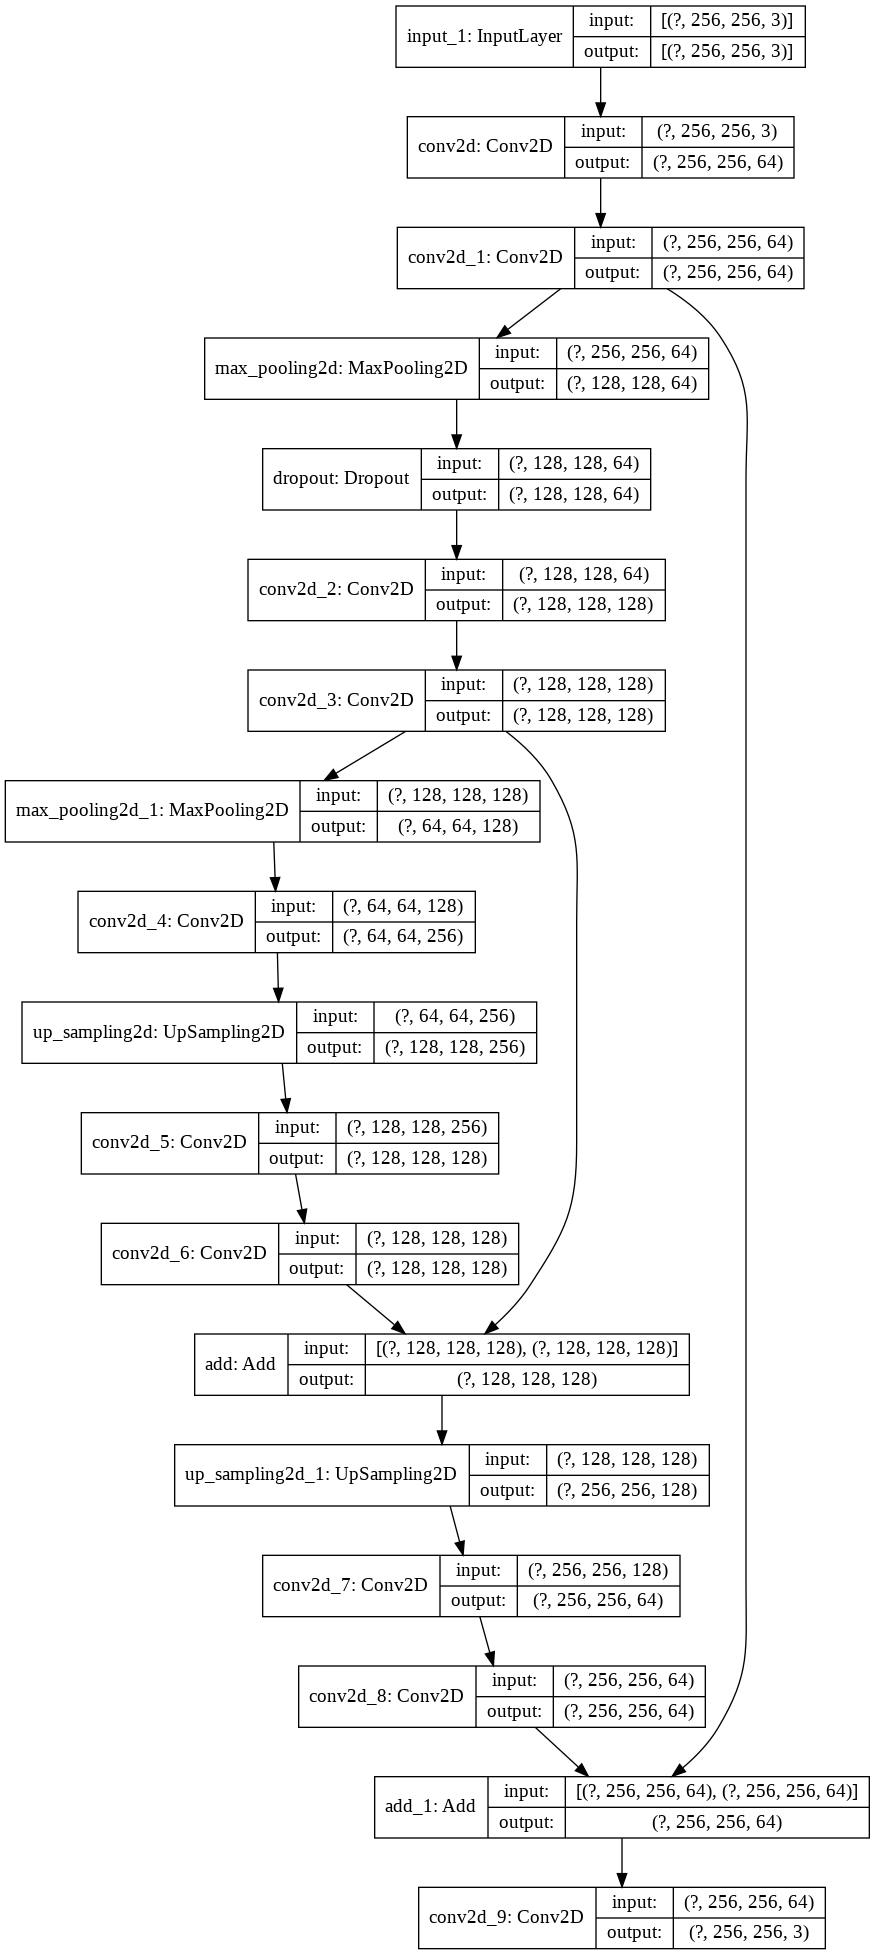

In [3]:
from keras.utils.vis_utils import plot_model
plot_model(SuperRes, to_file='/content/drive/My Drive/IoTDemo/superres_model_plot.png', show_shapes=True, show_layer_names=True)

In [4]:
from matplotlib import image
from skimage.transform import resize, rescale
import cv2
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from skimage import img_as_ubyte

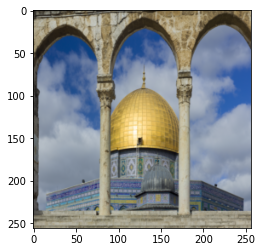

In [6]:
testimg="0675.png"
testimg_data = image.imread('/content/drive/My Drive/DIV2K_train_HR/' + testimg)
testimage_resized = resize(testimg_data, (256, 256))
plt.imshow(testimage_resized)

In [7]:
testimg_data

array([[[0.15686275, 0.13725491, 0.10980392],
        [0.14901961, 0.13333334, 0.10980392],
        [0.14117648, 0.12156863, 0.10980392],
        ...,
        [0.6745098 , 0.59607846, 0.4509804 ],
        [0.6627451 , 0.5882353 , 0.43137255],
        [0.654902  , 0.5803922 , 0.41960785]],

       [[0.13725491, 0.1254902 , 0.10196079],
        [0.1254902 , 0.12156863, 0.09411765],
        [0.13725491, 0.12156863, 0.10588235],
        ...,
        [0.67058825, 0.6       , 0.45490196],
        [0.6509804 , 0.5803922 , 0.43529412],
        [0.6509804 , 0.5764706 , 0.41960785]],

       [[0.13333334, 0.12156863, 0.10588235],
        [0.11372549, 0.11372549, 0.08235294],
        [0.13725491, 0.12156863, 0.10980392],
        ...,
        [0.6745098 , 0.62352943, 0.49411765],
        [0.6627451 , 0.60784316, 0.46666667],
        [0.6392157 , 0.57254905, 0.4117647 ]],

       ...,

       [[0.49019608, 0.44705883, 0.37254903],
        [0.4862745 , 0.4392157 , 0.3647059 ],
        [0.5176471 , 0

In [8]:
testimg_data=img_as_ubyte(testimg_data)

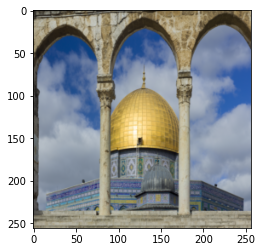

In [9]:
plt.imshow(testimage_resized)

In [10]:
testimg_data

array([[[ 40,  35,  28],
        [ 38,  34,  28],
        [ 36,  31,  28],
        ...,
        [172, 152, 115],
        [169, 150, 110],
        [167, 148, 107]],

       [[ 35,  32,  26],
        [ 32,  31,  24],
        [ 35,  31,  27],
        ...,
        [171, 153, 116],
        [166, 148, 111],
        [166, 147, 107]],

       [[ 34,  31,  27],
        [ 29,  29,  21],
        [ 35,  31,  28],
        ...,
        [172, 159, 126],
        [169, 155, 119],
        [163, 146, 105]],

       ...,

       [[125, 114,  95],
        [124, 112,  93],
        [132, 121, 101],
        ...,
        [166, 159, 135],
        [171, 161, 141],
        [172, 161, 143]],

       [[131, 120,  97],
        [133, 122, 101],
        [140, 129, 107],
        ...,
        [169, 159, 136],
        [171, 161, 139],
        [171, 159, 141]],

       [[138, 131, 103],
        [142, 133, 108],
        [142, 132, 108],
        ...,
        [167, 157, 133],
        [168, 160, 133],
        [168, 160, 139]]

In [11]:
testimage_resized = resize(testimg_data, (256, 256))

In [12]:
testimage_resized = img_as_ubyte(testimage_resized)

In [13]:
testimage_resized

array([[[ 31,  27,  23],
        [ 35,  31,  27],
        [ 40,  37,  32],
        ...,
        [149, 131,  94],
        [165, 150, 115],
        [172, 158, 125]],

       [[ 34,  30,  26],
        [ 40,  36,  31],
        [ 39,  36,  31],
        ...,
        [146, 129,  93],
        [166, 151, 114],
        [177, 165, 132]],

       [[ 43,  38,  32],
        [ 51,  47,  42],
        [ 42,  39,  35],
        ...,
        [151, 135,  98],
        [159, 144, 108],
        [176, 163, 132]],

       ...,

       [[137, 129, 109],
        [131, 123, 104],
        [130, 124, 105],
        ...,
        [166, 158, 139],
        [159, 151, 129],
        [152, 143, 122]],

       [[128, 119,  98],
        [129, 120, 100],
        [127, 120,  98],
        ...,
        [167, 160, 141],
        [165, 157, 136],
        [161, 153, 132]],

       [[130, 120,  99],
        [139, 131, 110],
        [147, 139, 117],
        ...,
        [174, 166, 148],
        [169, 162, 143],
        [168, 160, 140]]

In [14]:
testscale_percent = 50
testsrc=testimage_resized
testwidth = int(testsrc.shape[1] * testscale_percent / 100)
testheight = int(testsrc.shape[0] * testscale_percent / 100)

In [15]:
testdsize = (testwidth, testheight)

In [16]:
testoutput = cv2.resize(testsrc, testdsize)

In [17]:
testrescaled=cv2.resize(testoutput, (256,256))

In [18]:
testrescaled

array([[[ 35,  31,  27],
        [ 39,  35,  30],
        [ 46,  43,  37],
        ...,
        [149, 132,  95],
        [163, 148, 113],
        [170, 156, 122]],

       [[ 38,  34,  29],
        [ 42,  38,  32],
        [ 48,  45,  39],
        ...,
        [149, 132,  96],
        [162, 147, 112],
        [169, 155, 121]],

       [[ 45,  40,  34],
        [ 47,  43,  37],
        [ 52,  49,  43],
        ...,
        [148, 132,  97],
        [160, 145, 111],
        [166, 152, 118]],

       ...,

       [[143, 136, 116],
        [143, 136, 116],
        [144, 137, 117],
        ...,
        [156, 147, 128],
        [157, 149, 129],
        [158, 150, 129]],

       [[136, 127, 107],
        [137, 129, 108],
        [139, 132, 110],
        ...,
        [160, 151, 132],
        [162, 154, 134],
        [163, 155, 135]],

       [[132, 123, 102],
        [134, 125, 103],
        [137, 129, 106],
        ...,
        [162, 153, 134],
        [165, 156, 137],
        [166, 158, 138]]

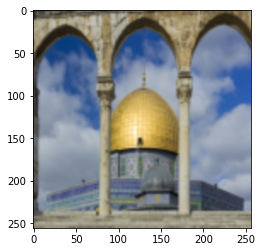

In [19]:
plt.imshow(testrescaled)

In [20]:
import tensorflow as tf
testimg=tf.expand_dims(testrescaled, axis=0)

In [21]:
testsr=SuperRes.predict(testimg)

In [22]:
testsr

array([[[[ 32.300682,  34.801304,  27.026972],
         [ 38.750217,  34.44172 ,  34.231045],
         [ 47.31819 ,  44.361183,  34.39874 ],
         ...,
         [148.76665 , 128.20284 ,  94.98173 ],
         [175.78242 , 140.01259 , 112.02831 ],
         [141.57434 , 127.955124,  99.42089 ]],

        [[ 30.139605,  32.266506,  28.102928],
         [ 36.14023 ,  31.519981,  29.199242],
         [ 42.28905 ,  38.984875,  36.033207],
         ...,
         [148.15727 , 128.73843 ,  95.91262 ],
         [189.5487  , 157.52928 , 121.513176],
         [166.13068 , 141.45418 , 129.752   ]],

        [[ 35.215824,  40.810272,  37.541084],
         [ 40.790276,  35.628178,  33.959717],
         [ 45.513103,  43.52389 ,  37.99118 ],
         ...,
         [138.95375 , 129.33257 ,  80.025246],
         [168.50858 , 144.7065  , 103.36415 ],
         [163.57976 , 147.66873 , 133.71147 ]],

        ...,

        [[142.00943 , 135.70772 , 109.05404 ],
         [145.80893 , 144.09692 , 124.64749 ]

In [23]:
testout=tf.keras.backend.squeeze(testsr, axis=0)

In [24]:
final=testout.numpy()

In [25]:
final=final.astype(int)

In [26]:
final

array([[[ 32,  34,  27],
        [ 38,  34,  34],
        [ 47,  44,  34],
        ...,
        [148, 128,  94],
        [175, 140, 112],
        [141, 127,  99]],

       [[ 30,  32,  28],
        [ 36,  31,  29],
        [ 42,  38,  36],
        ...,
        [148, 128,  95],
        [189, 157, 121],
        [166, 141, 129]],

       [[ 35,  40,  37],
        [ 40,  35,  33],
        [ 45,  43,  37],
        ...,
        [138, 129,  80],
        [168, 144, 103],
        [163, 147, 133]],

       ...,

       [[142, 135, 109],
        [145, 144, 124],
        [138, 134, 115],
        ...,
        [151, 143, 130],
        [162, 144, 137],
        [160, 139, 128]],

       [[131, 107, 100],
        [145, 147, 130],
        [131, 128, 115],
        ...,
        [161, 152, 144],
        [176, 166, 155],
        [163, 133, 124]],

       [[ 90,  85,  76],
        [115, 120, 107],
        [129, 121,  96],
        ...,
        [160, 152, 138],
        [162, 153, 129],
        [124, 115, 106]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


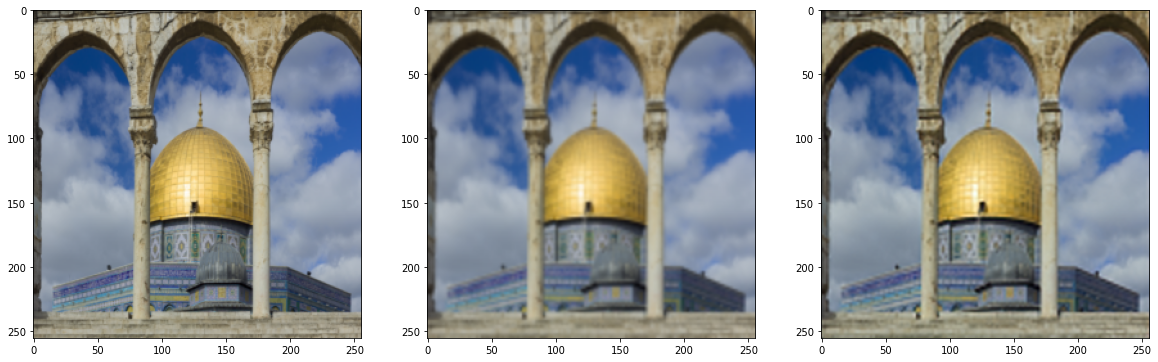

In [27]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(testimage_resized)
plt.subplot(1,3,2)
plt.imshow(testrescaled)
plt.subplot(1,3,3)
plt.imshow(final)

In [28]:
from skimage.measure import compare_ssim

In [29]:
#Structural Similarity Index Between Original HR and LR Images
(score, diff) = compare_ssim(testimage_resized,testimage_resized, full=True,multichannel=True)
diff = (diff * 255).astype("uint8")
print("SSIM of Original HR vs Original HR: {}".format(score))

SSIM of Original HR vs Original HR: 1.0


In [30]:
(score1, diff1) = compare_ssim(testimage_resized,testrescaled, full=True,multichannel=True)
diff1 = (diff1 * 255).astype("uint8")
print("SSIM of Original HR vs Original LR: {}".format(score1))

SSIM of Original HR vs Original LR: 0.9091636546768093


In [31]:
(score2, diff2) = compare_ssim(testimage_resized,final, full=True,multichannel=True)
diff2 = (diff2 * 255).astype("uint8")
print("SSIM of Original HR vs SuperRes Output: {}".format(score2))

SSIM of Original HR vs SuperRes Output: 0.9367588904312104
